In [1]:
#importing the required libraries to the python notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

In [2]:
#importing the csv dataset using pandas
r_data=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully to the notebook")

Data imported successfully to the notebook


In [3]:
#Displaying the dataset
r_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#number of rows and columns
r_data.shape

(25, 2)

In [5]:
#statistical details of the dataset
r_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Dispaying first 10 rows of the dataset
r_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


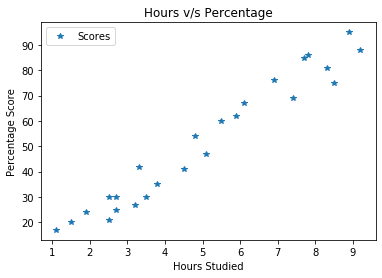

In [7]:
#Plotting the distribution of percentage score with respect to hours in a 2-D graph
r_data.plot(x='Hours',y='Scores', style='*')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
#Preparing the data

#Dividing the data into attributes and labels
x = r_data.iloc[:, :-1].values  
y = r_data.iloc[:, 1].values  
#Splitting this data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [9]:
#Training our algorithm from the train and test sets
regressor= LinearRegression()
regressor.fit(x_train,y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


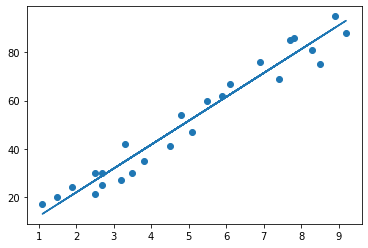

In [10]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [11]:
#displaying the test data(in Hours) and making some predictions on the test data
print(x_test)
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual output values for x_test with the Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


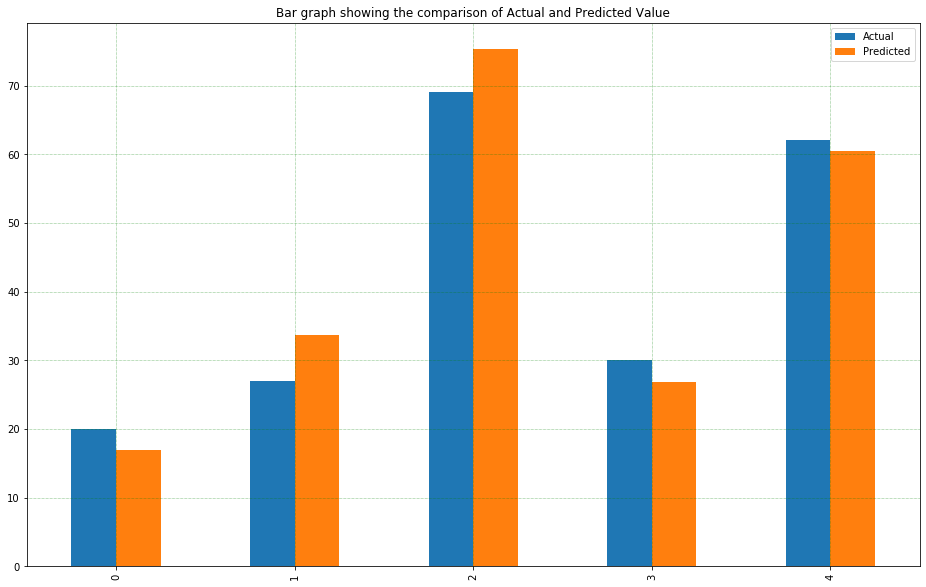

In [13]:
#Comparison of Actual and predicted value in Bar graph representation
df1=df
df1.plot(kind='bar',figsize=(16,10))
plt.title('Bar graph showing the comparison of Actual and Predicted Value')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [14]:
#Now, We can predict the score if a student study for 9.25 hrs in a day
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [15]:
#Now, We can evaluate the performance of the algorithm by using commonly used three evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
